# C3.AI Covid Challenge
## _Data Science Project 
### Author: 

##### Team BUK
    - Vrisha Parekh (https://www.linkedin.com/in/vrisha-parekh-72a630131/)
    - Sreetam Dev (https://www.linkedin.com/in/sreetam-dev-b76530143/)

### Dataset

This is a C3.AI Covid-19 Challenge Mobility datafile. For this purpose, Apple and Google Mobility trends data is utilised. Also, John Hopkins daily report is utilised to generate insights.

### Associated tasks
=========================================

Analyse and generate insights from the COVID-19 Mobility reports by fetching the datasets from the C3.AI COVID-19 datalake.

### Table of Contents


- **1. Loading libraries**

- **2. Exploring the data**

    - *2.1  Setting DateTimeIndex*

- **3.Loading the from GeoLocation file**

- **4.Defining the metrics**

    - 4.1 Activity share
    - 4.2  Mobility per capita
    - 4.3 Mobility variation wrt median

- **5.Seven day Rolling Mean Average.**


#### 1.Loading Libraries

In [58]:
import requests
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import gamma
import numpy as np
import datetime
import seaborn as sns
plt.style.use('ggplot')

In [59]:
import c3aidatalake

#### 2. Exploring the data

Google and Apple Mobility data.

In [60]:
### Google, Apple Mobility data along with JHU cases(Place IQ data is only for USA)

today = pd.Timestamp.now() - datetime.timedelta(days = 7)
today = today.strftime("%Y-%m-%d")

locations = ["Australia"]

metrics = [
    "JHU_ConfirmedCases",
    "JHU_ConfirmedDeaths",
    "Apple_TransitMobility",
    "Apple_WalkingMobility", 
    "Apple_DrivingMobility",
    "Google_ParksMobility",
    "Google_ResidentialMobility",
    "Google_GroceryMobility",
    "Google_TransitStationsMobility",
    "Google_RetailMobility",
    "Google_WorkplacesMobility"]

mobility_data = c3aidatalake.evalmetrics(
    "outbreaklocation",
    {
        "spec" : {
            "ids" : locations,
            "expressions" : metrics,
            "start" : "2020-02-15",
            "end" : today,
            "interval" : "DAY",
        }
    },
    get_all = True
)

mobility_data

,dates,Australia.JHU_ConfirmedCases.data,Australia.JHU_ConfirmedCases.missing,Australia.Apple_WalkingMobility.data,Australia.Apple_WalkingMobility.missing,Australia.Apple_TransitMobility.data,Australia.Apple_TransitMobility.missing,Australia.JHU_ConfirmedDeaths.data,Australia.JHU_ConfirmedDeaths.missing,Australia.Apple_DrivingMobility.data,...,Australia.Google_GroceryMobility.data,Australia.Google_GroceryMobility.missing,Australia.Google_ParksMobility.data,Australia.Google_ParksMobility.missing,Australia.Google_WorkplacesMobility.data,Australia.Google_WorkplacesMobility.missing,Australia.Google_RetailMobility.data,Australia.Google_RetailMobility.missing,Australia.Google_TransitStationsMobility.data,Australia.Google_TransitStationsMobility.missing
0,2020-02-15,15,0,110.5,0,98.78,0,0,0,93.51,...,103,0,98,0,103,0,104,0,103,0
0,2020-02-16,15,0,103.76,0,109.3,0,0,0,98.27,...,105,0,109,0,99,0,103,0,103,0
0,2020-02-17,15,0,102.99,0,111.03,0,0,0,101.79,...,100,0,94,0,117,0,99,0,107,0
0,2020-02-18,15,0,107.3,0,115.59,0,0,0,105.38,...,98,0,87,0,114,0,97,0,107,0
0,2020-02-19,15,0,112.78,0,114.53,0,0,0,107.29,...,99,0,94,0,113,0,99,0,108,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2020-11-06,27652,0,96.42,0,61.79,0,907,0,102.73,...,104,0,86,0,91,0,90,0,63,0
0,2020-11-07,27658,0,80.76,0,51.56,0,907,0,84.84,...,102,0,96,0,97,0,93,0,68,0
0,2020-11-08,27665,0,72.89,0,56.65,0,907,0,93.04,...,102,0,105,0,92,0,93,0,64,0
0,2020-11-09,27669,0,75.65,0,60.23,0,907,0,95.93,...,100,0,85,0,91,0,88,0,59,0


In [61]:
#Shape of the data.
print('Shape of the data is ',mobility_data.shape)

Shape of the data is  (270, 23)


In [62]:
#Viewing the stats
mobility_data.describe()

,dates,Australia.JHU_ConfirmedCases.data,Australia.JHU_ConfirmedCases.missing,Australia.Apple_WalkingMobility.data,Australia.Apple_WalkingMobility.missing,Australia.Apple_TransitMobility.data,Australia.Apple_TransitMobility.missing,Australia.JHU_ConfirmedDeaths.data,Australia.JHU_ConfirmedDeaths.missing,Australia.Apple_DrivingMobility.data,...,Australia.Google_GroceryMobility.data,Australia.Google_GroceryMobility.missing,Australia.Google_ParksMobility.data,Australia.Google_ParksMobility.missing,Australia.Google_WorkplacesMobility.data,Australia.Google_WorkplacesMobility.missing,Australia.Google_RetailMobility.data,Australia.Google_RetailMobility.missing,Australia.Google_TransitStationsMobility.data,Australia.Google_TransitStationsMobility.missing
count,270,270.0,270.0,270.0,270.0,270.0,270.0,270.0,270.0,270.0,...,270.0,270.0,270.0,270.0,270.0,270.0,270.0,270.0,270.0,270.0
unique,270,250.0,1.0,263.0,1.0,259.0,1.0,137.0,1.0,266.0,...,45.0,2.0,65.0,2.0,60.0,2.0,53.0,2.0,58.0,2.0
top,2020-03-13 00:00:00,15.0,0.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0,...,98.0,0.0,0.0,0.0,79.0,0.0,0.0,0.0,0.0,0.0
freq,1,14.0,270.0,2.0,270.0,2.0,270.0,25.0,270.0,2.0,...,29.0,248.0,22.0,248.0,18.0,264.0,22.0,248.0,22.0,248.0
first,2020-02-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-11-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
#Checking for nulls.
mobility_data.isnull().any()

dates                                               False
Australia.JHU_ConfirmedCases.data                   False
Australia.JHU_ConfirmedCases.missing                False
Australia.Apple_WalkingMobility.data                False
Australia.Apple_WalkingMobility.missing             False
Australia.Apple_TransitMobility.data                False
Australia.Apple_TransitMobility.missing             False
Australia.JHU_ConfirmedDeaths.data                  False
Australia.JHU_ConfirmedDeaths.missing               False
Australia.Apple_DrivingMobility.data                False
Australia.Apple_DrivingMobility.missing             False
Australia.Google_ResidentialMobility.data           False
Australia.Google_ResidentialMobility.missing        False
Australia.Google_GroceryMobility.data               False
Australia.Google_GroceryMobility.missing            False
Australia.Google_ParksMobility.data                 False
Australia.Google_ParksMobility.missing              False
Australia.Goog

In [64]:
#Checking for the duplicate records
print("Number of duplicated records in training set: ", mobility_data.duplicated().sum())

Number of duplicated records in training set:  0


#### 2.1 Setting DateTimeIndex

In [65]:
#Droping all the columns inidcating missingness of the data.
mobility_data = mobility_data.drop(mobility_data.filter(regex='missing').columns, axis=1)

In [66]:
#Setting the DateTimeIndex
mobility_data.set_index('dates',inplace=True)


In [67]:
#Renaming the columns

mobility_data.rename(columns = lambda x: x.strip('Australia'),inplace=True)
mobility_data.rename(columns = lambda x: x.strip('.'),inplace=True)
mobility_data.rename(columns = lambda x: x.strip('.data'),inplace=True)
mobility_data.columns

Index(['JHU_ConfirmedCases', 'Apple_WalkingMobility', 'Apple_TransitMobility',
       'JHU_ConfirmedDeaths', 'Apple_DrivingMobility',
       'Google_ResidentialMobility', 'Google_GroceryMobility',
       'Google_ParksMobility', 'Google_WorkplacesMobility',
       'Google_RetailMobility', 'Google_TransitStationsMobility'],
      dtype='object')

In [68]:
#Adding month and day column using the index.
mobility_data['month']= mobility_data.index.month
mobility_data['day']= mobility_data.index.day_name()

In [69]:
#Rearranging the dataframe.
mobility_data=mobility_data[['JHU_ConfirmedCases','JHU_ConfirmedDeaths','Apple_WalkingMobility', 'Apple_TransitMobility','Apple_DrivingMobility',
       'Google_ResidentialMobility', 'Google_GroceryMobility',
       'Google_ParksMobility', 'Google_WorkplacesMobility',
       'Google_RetailMobility', 'Google_TransitStationsMobility']]


#### 3. Loading the from GeoLocation.pynb file

In [70]:
#Reading lat long data
ausData=pd.read_csv('AusLatLong.csv')

In [71]:
# Fetching the National population for Australia
avg_population= np.average(ausData[ausData['state_abbr']=='Aus']['population'])

In [72]:
#Assigning it as a column to the mobility data.
dict_aus = {'Population':avg_population}
mobility_data['population']= dict_aus['Population']

In [73]:
#Creating the average public transit column
mobility_data['Public_Transit']= mobility_data[['Apple_TransitMobility','Google_TransitStationsMobility']].mean(axis=1)
mobility_data.drop(['Apple_TransitMobility','Google_TransitStationsMobility'],inplace=True,axis=1)

In [74]:
#Rearranging the dataframe
mobility_data=mobility_data[['Apple_WalkingMobility', 'Apple_DrivingMobility',
       'Google_ResidentialMobility', 'Google_GroceryMobility',
       'Google_ParksMobility', 'Google_WorkplacesMobility',
       'Google_RetailMobility','Public_Transit','JHU_ConfirmedCases','JHU_ConfirmedDeaths','population']]

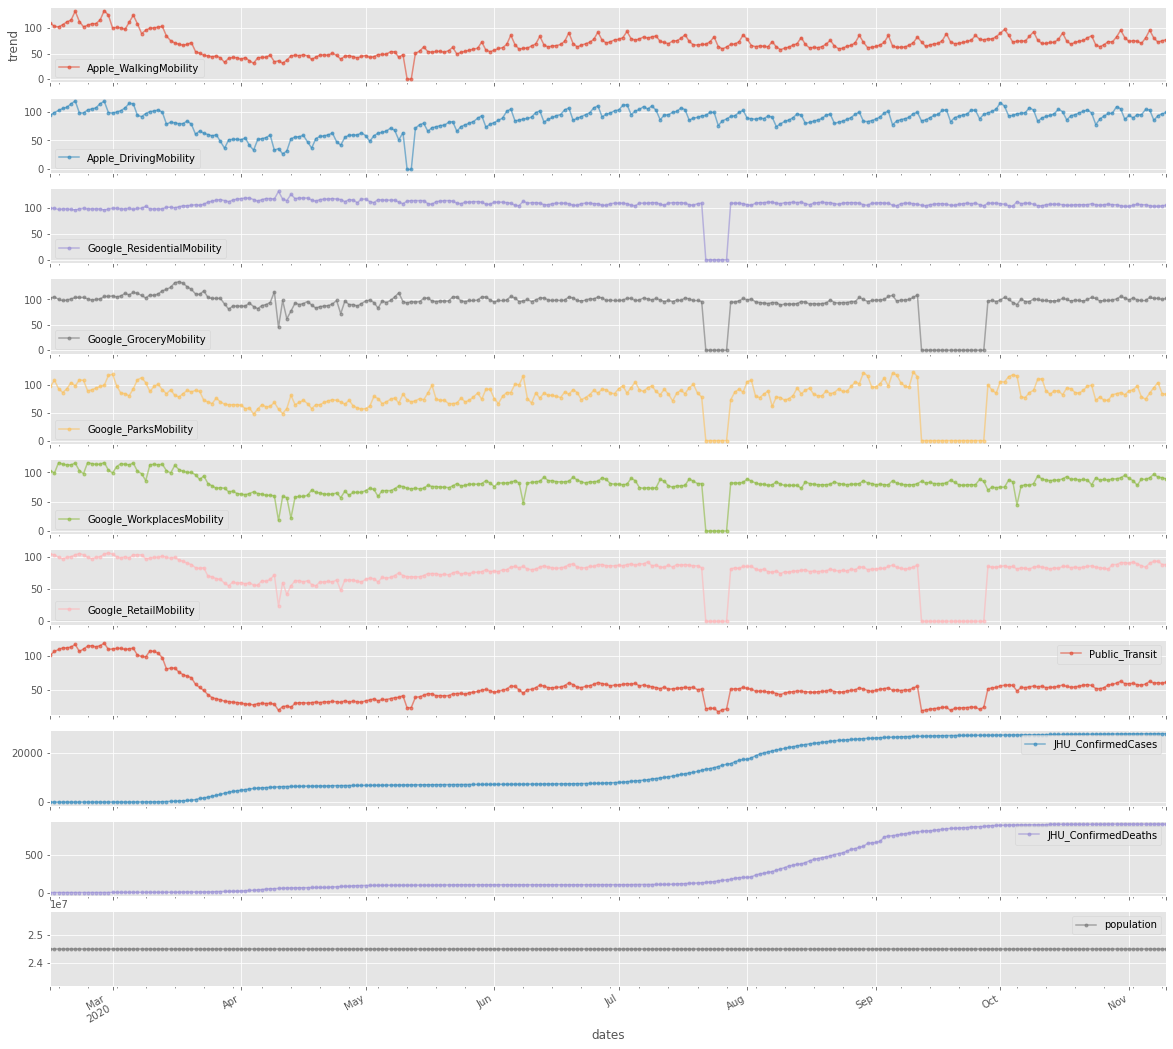

In [75]:
cols_list=mobility_data.columns

axes= mobility_data[cols_list].plot(marker='.',alpha=0.6,figsize=(20,20),subplots=True)
for ax in axes:
    ax.set_ylabel('trend')
    ax.legend(loc='best')
    plt.show()

#### 4.Defining the metrics

##### 4.1 Activity share

In [76]:
#Changing datatypes
mobility_data[['Apple_WalkingMobility', 'Apple_DrivingMobility','Google_ResidentialMobility','Google_GroceryMobility',
       'Google_ParksMobility', 'Google_WorkplacesMobility','Google_RetailMobility','JHU_ConfirmedCases','JHU_ConfirmedDeaths']]=mobility_data[['Apple_WalkingMobility', 'Apple_DrivingMobility','Google_ResidentialMobility','Google_GroceryMobility',
       'Google_ParksMobility', 'Google_WorkplacesMobility','Google_RetailMobility','JHU_ConfirmedCases','JHU_ConfirmedDeaths']].apply(pd.to_numeric)

In [77]:
#Creating the sum of all rows
mobility_data['sumRows']=mobility_data[['Apple_WalkingMobility', 'Apple_DrivingMobility',
       'Google_ResidentialMobility', 'Google_GroceryMobility',
       'Google_ParksMobility', 'Google_WorkplacesMobility',
       'Google_RetailMobility','Public_Transit']].sum(axis=1)

In [78]:
#Storing the share of each activity.
mobility_data.loc[:,'HealthActivity'] = (mobility_data.iloc[:,0:1].div(mobility_data["sumRows"], axis=0))*100
mobility_data.loc[:,'DrivingActivity'] = (mobility_data.iloc[:,1:2].div(mobility_data["sumRows"], axis=0))*100
mobility_data.loc[:,'ResidenceActivity'] = (mobility_data.iloc[:,2:3].div(mobility_data["sumRows"], axis=0))*100
mobility_data.loc[:,'GroceryActivity'] = (mobility_data.iloc[:,3:4].div(mobility_data["sumRows"], axis=0))*100
mobility_data.loc[:,'ParksActivity'] = (mobility_data.iloc[:,4:5].div(mobility_data["sumRows"], axis=0))*100
mobility_data.loc[:,'WorkActivity'] = (mobility_data.iloc[:,5:6].div(mobility_data["sumRows"], axis=0))*100
mobility_data.loc[:,'RetailActivity'] = (mobility_data.iloc[:,6:7].div(mobility_data["sumRows"], axis=0))*100
mobility_data.loc[:,'PublicTransActivity'] = (mobility_data.iloc[:,7:8].div(mobility_data["sumRows"], axis=0))*100

##### 4.2 Mobility Per Capita

In [79]:
mobility_data['mobilityCapita']=mobility_data['sumRows']/mobility_data['population']

##### 4.3 Mobility variation wrt Median

In [80]:
# Storing the median values of each mobility type.
mobility_data['walkingMedian']=mobility_data['Apple_WalkingMobility'].median()
mobility_data['drivingMedian']=mobility_data['Apple_DrivingMobility'].median()
mobility_data['residentialMedian']=mobility_data['Google_ResidentialMobility'].median()
mobility_data['groceryMedian']=mobility_data['Google_GroceryMobility'].median()
mobility_data['parkMedian']=mobility_data['Google_ParksMobility'].median()
mobility_data['workMedian']=mobility_data['Google_WorkplacesMobility'].median()
mobility_data['retailMedian']=mobility_data['Google_RetailMobility'].median()
mobility_data['publicTransMedian']=mobility_data['Public_Transit'].median()

#Mobility variation
mobility_data['walkingVar']= ((mobility_data['Apple_WalkingMobility']-mobility_data['walkingMedian'])/mobility_data['walkingMedian'])*100
mobility_data['drivingVar']= ((mobility_data['Apple_DrivingMobility']-mobility_data['drivingMedian'])/mobility_data['drivingMedian'])*100
mobility_data['residentialVar']= ((mobility_data['Google_ResidentialMobility']-mobility_data['residentialMedian'])/mobility_data['residentialMedian'])*100
mobility_data['groceryVar']= ((mobility_data['Google_GroceryMobility']-mobility_data['groceryMedian'])/mobility_data['groceryMedian'])*100
mobility_data['parkVar']= ((mobility_data['Google_ParksMobility']-mobility_data['parkMedian'])/mobility_data['parkMedian'])*100
mobility_data['workVar']= ((mobility_data['Google_WorkplacesMobility']-mobility_data['workMedian'])/mobility_data['workMedian'])*100
mobility_data['retailVar']= ((mobility_data['Google_RetailMobility']-mobility_data['retailMedian'])/mobility_data['retailMedian'])*100
mobility_data['publicTransVar']= ((mobility_data['Public_Transit']-mobility_data['publicTransMedian'])/mobility_data['publicTransMedian'])*100


In [81]:
#Dropping the non-necessary column.
mobility_data.drop('sumRows',inplace=True,axis=1)

In [82]:
# Uncomment the line below to export the DataFrame as a .csv file
mobility_data.to_csv("MobilityData.csv")

#### 5. Seven day Rolling Mean Average

In [83]:
#Finding the 7-day rolling mean average
rolMeanAvg= mobility_data.rolling(7).mean()


In [84]:
#Dropping Nan's
rolMeanAvg.dropna(how='all',inplace=True)

In [85]:
# Uncomment the line below to export the DataFrame as a .csv file
rolMeanAvg.to_csv("rollingMeanMobilityData.csv")